In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#!pip install seaborn
import seaborn as sns

In [32]:
path = ''
file = 'Life Expectancy Data.csv'

df = pd.read_csv(path + file)
df = df.dropna()

df = df.rename(columns={'Life expectancy ': 'Life expectancy'})

#replace string atributes with numbers
#df['Status'] = df['Status'].replace('Developing', 0.0)
#df['Status'] = df['Status'].replace('Developed', 1.0)

#X = df[df['Year'] == '2010']
X = df.drop(['Country'], axis=1)

# Select the dependent variable
y = df['Status'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Create a Sequential model
model = Sequential()

input_dim = X.shape[1]

# Add layers to the model
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the train set
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the accuracy
print('Test Accuracy:', accuracy)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [31]:
# First let's initialize a list with all the predicted values from the training set
y_pred = model.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

11/11 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

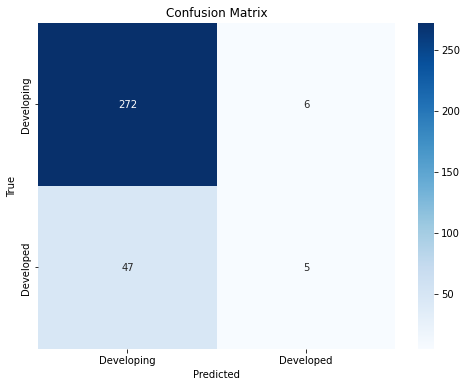

In [24]:
# Define the class labels
class_labels = ['Developing', 'Developed']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()